# **Part - A**

## **Import and Understand Data**

In [1]:
# Mounting google drive on colab instance

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
images_path = "/content/drive/My Drive/Colab Notebooks/plant-seedlings-classification.zip"

In [3]:
# Extracting from zip file

from zipfile import ZipFile
with ZipFile(images_path,'r') as zip:
  listOfFileNames = zip.namelist()
  zip.extractall(path='/content/drive/My Drive/Colab Notebooks/')

In [4]:
!ls

drive  sample_data


In [5]:
len(listOfFileNames)

4769

**B. Map the images from train folder with train labels to form a dataframe**

In [6]:
# Import libraries

import numpy as np # MATRIX OPERATIONS
import pandas as pd # EFFICIENT DATA STRUCTURES
import matplotlib.pyplot as plt # GRAPHING AND VISUALIZATIONS
import math # MATHEMATICAL OPERATIONS
import cv2 # IMAGE PROCESSING - OPENCV
from glob import glob # FILE OPERATIONS
import itertools
import os
import glob
from sklearn import preprocessing #Label Encoder

# Test Train Split
from sklearn.model_selection import train_test_split

# Optimizer
from tensorflow.keras.optimizers import Adam

# For random value generator
import random

# KERAS AND SKLEARN MODULES
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# GLOBAL VARIABLES
scale = 70
seed = 7



In [7]:
folder_path = "/content/drive/My Drive/Colab Notebooks/plant-seedlings-classification"

In [8]:
name=[]
class_=[]
actual=[]

In [9]:
for file in os.listdir(folder_path):
    d = os.path.join(folder_path, file)
    if os.path.isdir(d):
        print(d)
        for file in os.listdir(d):
          c = os.path.join(d, file)
          if os.path.isdir(c):
            print(c)
            class_.append(c)
            my_files=glob.glob(c+'/'+"*.png")
            for i in my_files :
              print(i)
              name.append(i)
            

/content/drive/My Drive/Colab Notebooks/plant-seedlings-classification/train
/content/drive/My Drive/Colab Notebooks/plant-seedlings-classification/train/Cleavers
/content/drive/My Drive/Colab Notebooks/plant-seedlings-classification/train/Cleavers/6a4ef17c2.png
/content/drive/My Drive/Colab Notebooks/plant-seedlings-classification/train/Cleavers/0515bc601.png
/content/drive/My Drive/Colab Notebooks/plant-seedlings-classification/train/Cleavers/0ac327873.png
/content/drive/My Drive/Colab Notebooks/plant-seedlings-classification/train/Cleavers/94f82e916.png
/content/drive/My Drive/Colab Notebooks/plant-seedlings-classification/train/Cleavers/2c5c4d127.png
/content/drive/My Drive/Colab Notebooks/plant-seedlings-classification/train/Cleavers/44ef950c3.png
/content/drive/My Drive/Colab Notebooks/plant-seedlings-classification/train/Cleavers/952540220.png
/content/drive/My Drive/Colab Notebooks/plant-seedlings-classification/train/Cleavers/85b23f3e6.png
/content/drive/My Drive/Colab Noteboo

In [10]:
data = pd.DataFrame(columns=['Image_Name','Class_Name','Actual_Image'])

In [11]:
index=0
border=77
spl_word='/'
for i in name:
  actual_image=name[index]
  print("Actual Image : ",actual_image)
  b=actual_image[border:]
  class_name = b.partition(spl_word)[0]
  print("class : ",class_name)
  addition=len(class_name)
  addition=addition+border
  image_name=actual_image[addition+1:]
  print("Image Name : ",image_name)
  data = data.append({'Image_Name': image_name,'Class_Name' : class_name,'Actual_Image' : actual_image}, ignore_index=True)
  print("\n")
  index=index+1

Streaming output truncated to the last 5000 lines.
Actual Image :  /content/drive/My Drive/Colab Notebooks/plant-seedlings-classification/train/Small-flowered Cranesbill/7c3ca61ff.png
class :  Small-flowered Cranesbill
Image Name :  7c3ca61ff.png


Actual Image :  /content/drive/My Drive/Colab Notebooks/plant-seedlings-classification/train/Small-flowered Cranesbill/66689513f.png
class :  Small-flowered Cranesbill
Image Name :  66689513f.png


Actual Image :  /content/drive/My Drive/Colab Notebooks/plant-seedlings-classification/train/Small-flowered Cranesbill/605478787.png
class :  Small-flowered Cranesbill
Image Name :  605478787.png


Actual Image :  /content/drive/My Drive/Colab Notebooks/plant-seedlings-classification/train/Small-flowered Cranesbill/29ed37400.png
class :  Small-flowered Cranesbill
Image Name :  29ed37400.png


Actual Image :  /content/drive/My Drive/Colab Notebooks/plant-seedlings-classification/train/Small-flowered Cranesbill/eb8f098fa.png
class :  Small-flowered 

In [12]:
data

Image_Name Class_Name  \
0     6a4ef17c2.png   Cleavers   
1     0515bc601.png   Cleavers   
2     0ac327873.png   Cleavers   
3     94f82e916.png   Cleavers   
4     2c5c4d127.png   Cleavers   
...             ...        ...   
4745  b8b2658d9.png      Maize   
4746  edd80f8a8.png      Maize   
4747  8c71f9b84.png      Maize   
4748  fb6328acb.png      Maize   
4749  87a3254c9.png      Maize   

                                           Actual_Image  
0     /content/drive/My Drive/Colab Notebooks/plant-...  
1     /content/drive/My Drive/Colab Notebooks/plant-...  
2     /content/drive/My Drive/Colab Notebooks/plant-...  
3     /content/drive/My Drive/Colab Notebooks/plant-...  
4     /content/drive/My Drive/Colab Notebooks/plant-...  
...                                                 ...  
4745  /content/drive/My Drive/Colab Notebooks/plant-...  
4746  /content/drive/My Drive/Colab Notebooks/plant-...  
4747  /content/drive/My Drive/Colab Notebooks/plant-...  
4748  /content/drive/My Drive/Colab Notebooks/plant-...  
4749  /content/drive/My Drive/Colab Notebooks/plant-...  

[4750 rows x 3 columns]

In [13]:
new_data=data

**C. Select n random images and display along with its species**

[2237 2700 3330 4524  379 4348  748  494 1828  436]
<class 'numpy.ndarray'>
2237


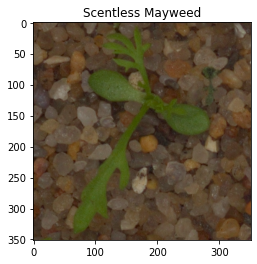

2700


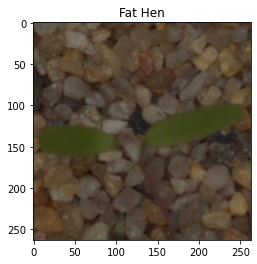

3330


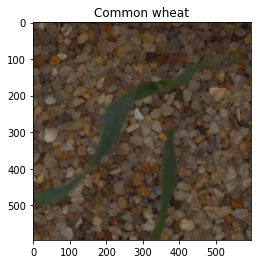

4524


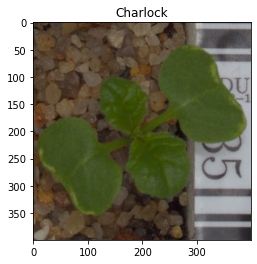

379


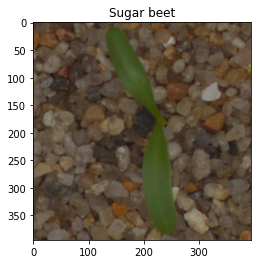

4348


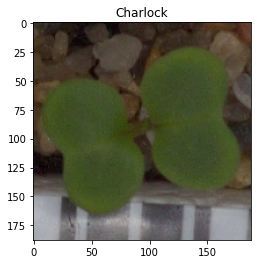

748


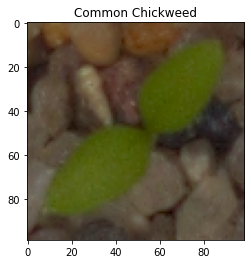

494


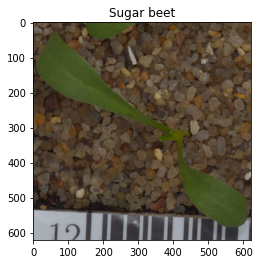

1828


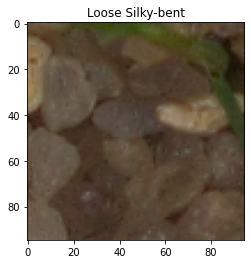

436


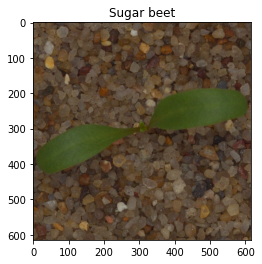

In [14]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

rand = np.random.randint(0, len(data), 10) 
print(rand)
print(type(rand))

for x in rand:
  print(x)
  images=data["Actual_Image"].values[x]
  title=data["Class_Name"].values[x]
  image = mpimg.imread(images)
  #image = cv2.resize(image, (128, 128))
  plt.imshow(image)
  plt.title("{}".format(title))
  plt.show()

## **Data Processing**

**A. &  C. Unify shape of all the images first and then Create X and y**

In [15]:
# Get the folder of dataset
dataset=name[0]
dataset=dataset[:border]
dataset

'/content/drive/My Drive/Colab Notebooks/plant-seedlings-classification/train/'

[3368 4187 3292]
3368
(968, 968, 3)


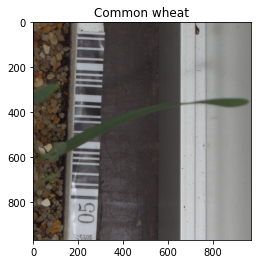

4187
(824, 824, 3)


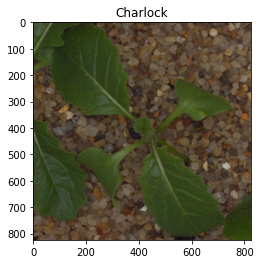

3292
(64, 64, 3)


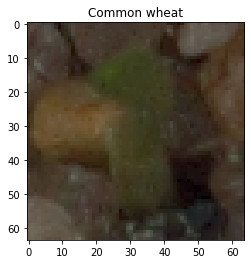

In [16]:
# Check what are the dimesions of the random images

rand_image = np.random.randint(0, len(data), 3) 
print(rand_image)

for x in rand_image:
  print(x)
  images=data["Actual_Image"].values[x]
  title=data["Class_Name"].values[x]
  image = mpimg.imread(images)
  print(image.shape)
  #image = cv2.resize(image, (128, 128))
  plt.imshow(image)
  plt.title("{}".format(title))
  plt.show()

In [17]:

X = []
y = []
labels = []

# list all folders inside train directory
for i in os.listdir(dataset):
    print(i)
    if i!= '.DS_Store':   
      labels.append(i)        
      for j in os.listdir(os.path.join(dataset, i)):
        # read each image inside train directory one by one
        dummy = cv2.imread(os.path.join(dataset, i, j))
        dummy = cv2.resize(dummy, (128, 128))   # Resizing can be any number - 128 is just kept for standard reference
        X.append(dummy)
        y.append(i)

Cleavers
.DS_Store
Sugar beet
Common Chickweed
Loose Silky-bent
Scentless Mayweed
Shepherds Purse
Fat Hen
Common wheat
Black-grass
Small-flowered Cranesbill
Charlock
Maize


In [18]:
print(len(X), len(y))

4750 4750


In [19]:
X = np.array(X)
y = np.array(y)

print(X.shape, y.shape)

(4750, 128, 128, 3) (4750,)


**B. Encode labels of the image**

In [20]:
np.unique(y)
print(y)

['Cleavers' 'Cleavers' 'Cleavers' ... 'Maize' 'Maize' 'Maize']


In [21]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in y
y= label_encoder.fit_transform(y)
print(y)
np.unique(y)


[2 2 2 ... 7 7 7]


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

**D. Normalise all the images**

In [22]:
# Not normalized data
X

array([[[[ 29,  47,  48],
         [ 28,  50,  41],
         [ 40,  59,  51],
         ...,
         [ 85, 102, 118],
         [ 94, 113, 129],
         [ 60,  78,  97]],

        [[ 26,  46,  43],
         [ 26,  50,  41],
         [ 31,  52,  42],
         ...,
         [ 85,  99, 115],
         [ 98, 114, 130],
         [ 61,  74,  94]],

        [[ 18,  44,  35],
         [ 30,  50,  42],
         [ 44,  63,  54],
         ...,
         [ 81,  97, 112],
         [ 77,  94, 107],
         [ 57,  74,  91]],

        ...,

        [[ 29,  50,  68],
         [ 31,  50,  68],
         [ 33,  59,  79],
         ...,
         [ 66,  87,  99],
         [ 45,  67,  84],
         [ 29,  43,  64]],

        [[ 67,  84, 104],
         [ 67,  82, 101],
         [ 74,  92, 107],
         ...,
         [ 66,  85,  99],
         [ 34,  53,  73],
         [ 35,  55,  68]],

        [[ 76,  94, 110],
         [ 66,  85, 102],
         [ 78,  97, 111],
         ...,
         [ 64,  79,  95],
        

In [23]:
X=X/255

In [24]:
# Normalized data
X

array([[[[0.11372549, 0.18431373, 0.18823529],
         [0.10980392, 0.19607843, 0.16078431],
         [0.15686275, 0.23137255, 0.2       ],
         ...,
         [0.33333333, 0.4       , 0.4627451 ],
         [0.36862745, 0.44313725, 0.50588235],
         [0.23529412, 0.30588235, 0.38039216]],

        [[0.10196078, 0.18039216, 0.16862745],
         [0.10196078, 0.19607843, 0.16078431],
         [0.12156863, 0.20392157, 0.16470588],
         ...,
         [0.33333333, 0.38823529, 0.45098039],
         [0.38431373, 0.44705882, 0.50980392],
         [0.23921569, 0.29019608, 0.36862745]],

        [[0.07058824, 0.17254902, 0.1372549 ],
         [0.11764706, 0.19607843, 0.16470588],
         [0.17254902, 0.24705882, 0.21176471],
         ...,
         [0.31764706, 0.38039216, 0.43921569],
         [0.30196078, 0.36862745, 0.41960784],
         [0.22352941, 0.29019608, 0.35686275]],

        ...,

        [[0.11372549, 0.19607843, 0.26666667],
         [0.12156863, 0.19607843, 0.26666667]

In [25]:
X.shape

(4750, 128, 128, 3)

In [26]:
y.shape

(4750,)

## **Model Training**

**A. Split the data into train and test data**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
X_train.shape

(3800, 128, 128, 3)

In [29]:
y_train.shape

(3800,)

In [30]:
X_test.shape

(950, 128, 128, 3)

In [31]:
y_test.shape

(950,)

**B. Create CNN architecture**

In [32]:
# Changing the Target parameter as per the requirement of the NN model

# one hot encode outputs
import pandas as pd
y_train_NN = pd.get_dummies(y_train)
y_test_NN = pd.get_dummies(y_test)

In [33]:
# Initialising the CNN classifier
model = Sequential()


# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
model.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 64 kernels of 3X3 shape with activation function ReLU
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 128 kernels of 3X3 shape with activation function ReLU
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 128 kernels of 3X3 shape with activation function ReLU
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
model.add(Flatten())

# Adding a fully connected layer with 512 neurons
model.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.4
model.add(Dropout(0.4))


# Adding a fully connected layer with 128 neurons
model.add(Dense(units = 128, activation = 'relu'))


# The final output layer with 12 neurons to predict the categorical classifcation
model.add(Dense(units = 12, activation = 'softmax'))

In [34]:
# Optimization 

optimizer_1 = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)
model.compile(optimizer = optimizer_1, loss = 'categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [35]:
# Summary of model : How many parameters in each layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0

**C. Train the model on test data and validate on test data**

In [36]:
# Define hyperparameters and fit the model

batch_size = 100
nb_epochs = 30
history = model.fit(X_train, y_train_NN,batch_size=batch_size,epochs=nb_epochs, validation_data=(X_test, y_test_NN),initial_epoch=0, verbose=1)

Epoch 1/30
38/38 [==============================] - 13s 56ms/step - loss: 2.4295 - accuracy: 0.1316 - val_loss: 2.4151 - val_accuracy: 0.1379
Epoch 2/30
38/38 [==============================] - 1s 36ms/step - loss: 2.3881 - accuracy: 0.1747 - val_loss: 2.1613 - val_accuracy: 0.2537
Epoch 3/30
38/38 [==============================] - 1s 36ms/step - loss: 1.9358 - accuracy: 0.3216 - val_loss: 1.6485 - val_accuracy: 0.4305
Epoch 4/30
38/38 [==============================] - 1s 36ms/step - loss: 1.5751 - accuracy: 0.4392 - val_loss: 1.4077 - val_accuracy: 0.4937
Epoch 5/30
38/38 [==============================] - 1s 36ms/step - loss: 1.3508 - accuracy: 0.5205 - val_loss: 1.2097 - val_accuracy: 0.5926
Epoch 6/30
38/38 [==============================] - 1s 36ms/step - loss: 1.1429 - accuracy: 0.6032 - val_loss: 1.1577 - val_accuracy: 0.5726
Epoch 7/30
38/38 [==============================] - 1s 36ms/step - loss: 0.9727 - accuracy: 0.6624 - val_loss: 1.0050 - val_accuracy: 0.6579
Epoch 8/30
3

Text(0.5, 1.0, 'Training and validation loss')

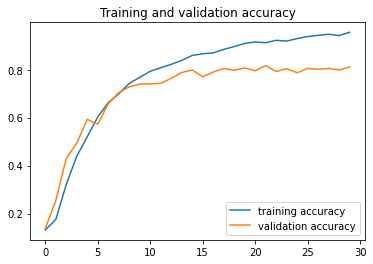

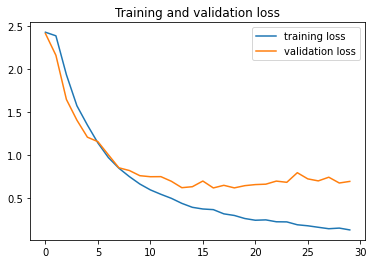

In [37]:
## Accuracy and Loss plots

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

labels: ['Cleavers', 'Sugar beet', 'Common Chickweed', 'Loose Silky-bent', 'Scentless Mayweed', 'Shepherds Purse', 'Fat Hen', 'Common wheat', 'Black-grass', 'Small-flowered Cranesbill', 'Charlock', 'Maize']
Softmax Outputs: [[2.4345287e-05 2.4683895e-09 2.7452396e-07 2.0689131e-06 1.2598335e-05
  1.8690392e-06 1.8598061e-04 1.0880183e-05 9.9930060e-01 5.0691195e-08
  1.6271279e-08 4.6132246e-04]]
1.0
Predicted_Label: Black-grass
Actual Label: 8


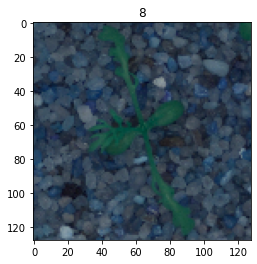

In [38]:
  # Predicting and vizualizing the test image

import matplotlib.pyplot as plt
%matplotlib inline

n=random.randint(0,949)
#n = 100

print('labels:', labels)
plt.title(y_test[n])
plt.imshow(X_test[n])
y_pred = model.predict(X_test[n].reshape(1,128,128,3))
print("Softmax Outputs:", y_pred)
print(y_pred.sum())


# Convert the predicted probabilities to labels

for i in y_pred:
    for j, k in enumerate(i):
        if k == y_pred.max():
            print('Predicted_Label:', labels[j])

print("Actual Label:",y_test[n])

The predicted class is having the highest value in softmax function
The model is able to predict the test image correctly.

# **Part - B**

## **Import and Understand Data**

**A. Import and read oxflower17 dataset from tflearn**

In [39]:
!pip install tflearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 107 kB 10.1 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=288deb908a52e7c91960a5b30819702cb231016aa08beb87f32f01ed3bf862cf
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [40]:
import tflearn
import tflearn.datasets.oxflower17 as oxflower17

Instructions for updating:
non-resource variables are not supported in the long term


In [41]:
# Splitting into X and y while loading

X, y = oxflower17.load_data(resize_pics=(224,224))

100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


**B. Number of Images and shape of images**

In [42]:
print('Total Number of images : ',len(X))

Total Number of images :  1360


In [43]:
print('X shape : ',X.shape)
print('y shape : ', y.shape)

X shape :  (1360, 224, 224, 3)
y shape :  (1360,)


**C. Count of each class from y**

In [44]:
import numpy as np # MATRIX OPERATIONS
import pandas as pd # EFFICIENT DATA STRUCTURES
import matplotlib.pyplot as plt # GRAPHING AND VISUALIZATIONS
# For random value generator
import random

#Displaying images
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

# To display transformed images
import cv2

# Test Train Spli
from sklearn.model_selection import train_test_split


# Logistic Regression
from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Utilities for classification report
from sklearn.metrics import classification_report

# Neural Network
import tensorflow 
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation


In [45]:
# KERAS AND SKLEARN MODULES
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# GLOBAL VARIABLES
scale = 70
seed = 7


In [46]:
type(y)

numpy.ndarray

In [47]:

unique, counts = np.unique(y, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result)

[[ 0 80]
 [ 1 80]
 [ 2 80]
 [ 3 80]
 [ 4 80]
 [ 5 80]
 [ 6 80]
 [ 7 80]
 [ 8 80]
 [ 9 80]
 [10 80]
 [11 80]
 [12 80]
 [13 80]
 [14 80]
 [15 80]
 [16 80]]


In [48]:
print("Total labels: {}".format(len(np.unique(y))))
print("Labels: {}".format(y))


Total labels: 17
Labels: [ 2  1  2 ... 12  1 12]


The labels are already encoded

## **Image Exploration and Transformation**

**A. Display 5 random images**

[1201  227 1116  215  739]
1201
(224, 224, 3)


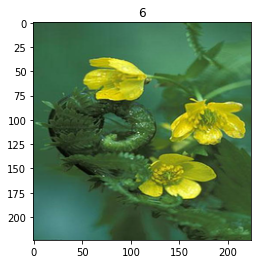

227
(224, 224, 3)


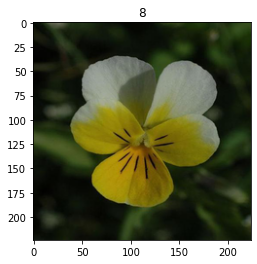

1116
(224, 224, 3)


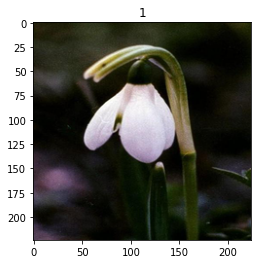

215
(224, 224, 3)


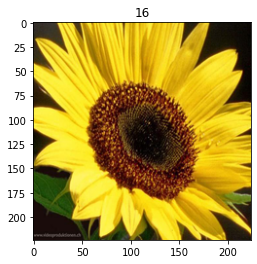

739
(224, 224, 3)


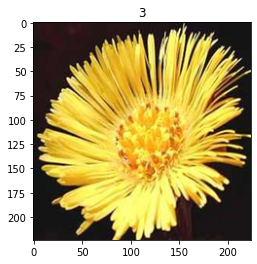

In [49]:
rand_image = np.random.randint(0, len(y), 5) 
print(rand_image)

for i in rand_image:
  print(i)
  image=X[i]
  print(image.shape)
  plt.title(y[i])
  plt.imshow(image)
  plt.show()

**B. Select any image and assign it to a variable**

In [50]:
sample_image = np.random.randint(0, len(X), 1)
print(sample_image)

[165]


165
(224, 224, 3)


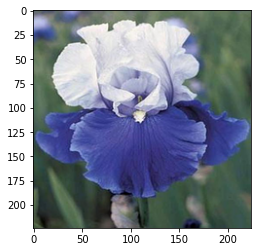

In [51]:
for i in sample_image:
  print(i)
  image=X[i]
  print(image.shape)
  plt.imshow(image)
  plt.show()

**C. Transform the image into grayscale format and display**

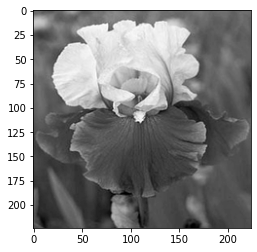

In [52]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_image,cmap='gray')
plt.show()

**D. Apply filter to sharpen the image**

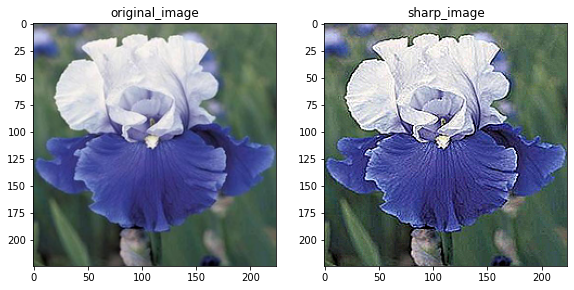

In [53]:
sharp_filter = np.array([[0,-1,0],
                        [-1,5,-1],
                        [0,-1,0]])
sharp_image = cv2.filter2D(image,kernel=sharp_filter,ddepth=-1)

sharp_image_title = ['original_image','sharp_image']

plt.figure(figsize=(20,20))
for i,img in enumerate([image, sharp_image]):
    plt.subplot(1,4,i+1)
    plt.title(sharp_image_title[i])
    plt.imshow(img)

**E. Apply filter to blur the image**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


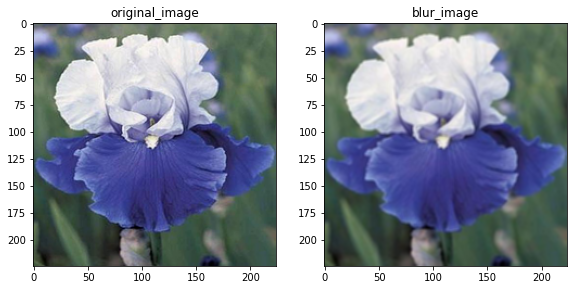

In [54]:
blur_filter = np.ones((3, 3), np.float)/(9.0)
blur_image = cv2.filter2D(image,kernel=blur_filter,ddepth=-1)

blur_image_title = ['original_image','blur_image']

plt.figure(figsize=(20,20))
for i,img in enumerate([image, blur_image]):
    plt.subplot(1,4,i+1)
    plt.title(blur_image_title[i])
    plt.imshow(img)

**F. Display all images beside each other**

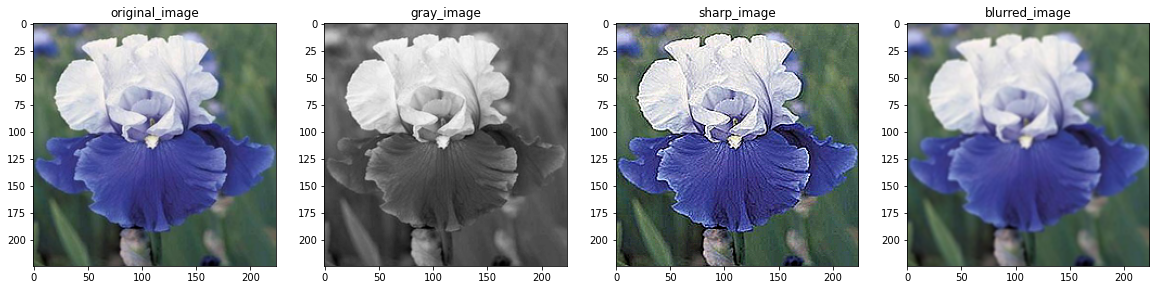

In [55]:
img_title = ['original_image', 'gray_image','sharp_image', 'blurred_image']

plt.figure(figsize=(20,20))
for i,img in enumerate([image, gray_image, sharp_image,blur_image]):
    plt.subplot(1,4,i+1)
    plt.title(img_title[i])
    plt.imshow(img,cmap='gray')

## **Model Training and Tuning**

**A. Split the data into train and test with 80:20**

In [56]:
X = np.array(X)
y = np.array(y)

print(X.shape, y.shape)

(1360, 224, 224, 3) (1360,)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**B. Train a model using Supervised Learning (Logistic Regression) and share the performance**

In [58]:
# Reshaping the train and test data as per the SL model requirement

X_train_SL = X_train.astype('float32')
X_train_SL = X_train_SL.reshape(X_train_SL.shape[0], 150528) # 224*224*3 = 150528
X_train_SL = X_train_SL/255

X_test_SL = X_test.astype('float32')
X_test_SL = X_test_SL.reshape(X_test_SL.shape[0], 150528)
X_test_SL = X_test_SL/255

print('Train_Shape:', X_train_SL.shape, y_train.shape)
print('Test_Shape:', X_test_SL.shape, y_test.shape)

Train_Shape: (1088, 150528) (1088,)
Test_Shape: (272, 150528) (272,)


In [59]:
# Building Supervised Model

LogReg = LogisticRegression()
LogReg.fit(X_train_SL, y_train)

y_pred_train=LogReg.predict(X_train_SL)
LogReg_Accuracy_Train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
print("Train Accuracy : ", LogReg_Accuracy_Train)

y_pred_test = LogReg.predict(X_test_SL)
LogReg_Accuracy_Test = accuracy_score(y_true=y_test, y_pred=y_pred_test)
print("Test Accuracy : ", LogReg_Accuracy_Test)

Train Accuracy :  0.5330882352941176
Test Accuracy :  0.33088235294117646


In [60]:
# Printing the classification report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.60      0.38      0.46        16
           1       0.50      0.06      0.11        16
           2       0.41      0.69      0.51        16
           3       0.00      0.00      0.00        16
           4       0.30      0.69      0.42        16
           5       0.11      0.06      0.08        16
           6       0.50      0.19      0.27        16
           7       0.46      0.38      0.41        16
           8       0.40      0.38      0.39        16
           9       0.29      0.62      0.39        16
          10       0.17      0.25      0.20        16
          11       0.29      0.31      0.30        16
          12       0.33      0.44      0.38        16
          13       0.33      0.06      0.11        16
          14       0.14      0.06      0.09        16
          15       0.67      0.25      0.36        16
          16       0.38      0.81      0.52        16

    accuracy              

**C. Train a model using NN and share the performance**

In [61]:
# create NN model
model = Sequential()  

# Batch Norm Layer
model.add(BatchNormalization(input_shape = (150528,))) # 224*224*3

# Adding Fully Connected Layer with 'ReLU' activation and drop out rate = 40%
model.add(Dense(1024, activation='relu')) 
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.2))
# Adding Dense Layer with 'ReLU' activation 
model.add(Dense(256, activation='relu')) 
model.add(Dense(128, activation='relu'))

# Adding Dense Layer with 'ReLU' activation 
model.add(Dense(128, activation='relu')) 
model.add(Dense(64, activation='relu'))

# Adding Dense Layer with 'ReLU' activation and drop out rate = 20%
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(32, activation='relu'))
# We have 17 categories, therefore 17 neurons in output layer
model.add(Dense(17, activation='softmax'))
    

Instructions for updating:
Colocations handled automatically by placer.


In [62]:
# Compile the model

# Loss function used Categorical cross entropy and Adam optimizer is used 
adam = optimizers.Adam(learning_rate=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) 

In [63]:
# Changing the Target parameter as per the requirement of the NN model

# one hot encode outputs
y_train_NN = pd.get_dummies(y_train)
y_test_NN = pd.get_dummies(y_test)

In [64]:
# Fit the model
history = model.fit(X_train_SL, y_train_NN, validation_data=(X_test_SL, y_test_NN), epochs=50, batch_size=20, verbose=1)

Train on 1088 samples, validate on 272 samples
Epoch 1/50
1088/1088 [==============================] - ETA: 0s - loss: 2.7484 - acc: 0.1149

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1088/1088 [==============================] - 3s 2ms/sample - loss: 2.7484 - acc: 0.1149 - val_loss: 2.8228 - val_acc: 0.0625
Epoch 2/50
1088/1088 [==============================] - 2s 2ms/sample - loss: 2.4712 - acc: 0.1737 - val_loss: 2.7727 - val_acc: 0.0956
Epoch 3/50
1088/1088 [==============================] - 2s 2ms/sample - loss: 2.2456 - acc: 0.2215 - val_loss: 2.8454 - val_acc: 0.0735
Epoch 4/50
1088/1088 [==============================] - 2s 1ms/sample - loss: 2.1086 - acc: 0.2675 - val_loss: 2.7495 - val_acc: 0.0919
Epoch 5/50
1088/1088 [==============================] - 2s 2ms/sample - loss: 1.9993 - acc: 0.2767 - val_loss: 2.6717 - val_acc: 0.1066
Epoch 6/50
1088/1088 [==============================] - 2s 2ms/sample - loss: 1.8834 - acc: 0.3097 - val_loss: 2.6213 - val_acc: 0.1949
Epoch 7/50
1088/1088 [==============================] - 2s 1ms/sample - loss: 1.8355 - acc: 0.3557 - val_loss: 2.7611 - val_acc: 0.0735
Epoch 8/50
1088/1088 [==============================] - 2s 

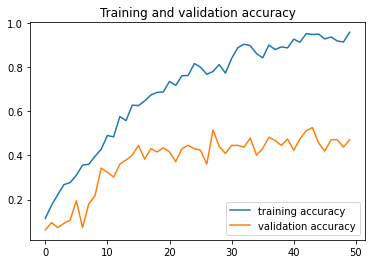

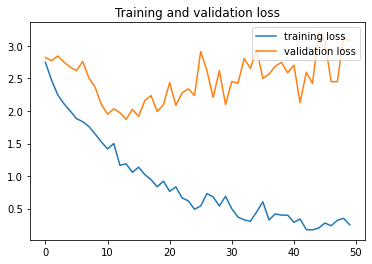

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.title ('Training and validation loss')
plt.legend(loc = 'upper right')

In [66]:
NN_perf_met = pd.DataFrame({'Method':['Neural Network'], 'Train accuracy': max(accuracy), 
                           'Test accuracy': max(val_accuracy)})
print('Neural Network Performance Metric :\n\n', NN_perf_met)

Neural Network Performance Metric :

            Method  Train accuracy  Test accuracy
0  Neural Network        0.956801       0.525735


**D. Train a basic CNN Model and check performance metrics**

In [67]:
# Building a CNN

# Initialising the CNN classifier
classifier = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu', padding = 'same'))
# Add a Max Pooling layer of size 2X2
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
# Add a Max Pooling layer of size 2X2
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 64 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 64 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 128 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier.add(Dense(units = 512, activation = 'relu'))
# Adding dropout with probability 0.4
classifier.add(Dropout(0.4))
# Adding a fully connected layer with 128 neurons
classifier.add(Dense(units = 128, activation = 'relu'))


# The final output layer with 17 neuron to predict the categorical classifcation
classifier.add(Dense(units = 17, activation = 'softmax'))

In [68]:
# Using adam optimizer and compile the model

adam_cnn = optimizers.Adam()
classifier.compile(optimizer = adam_cnn, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [69]:
# Fit the model

history_cnn = classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=50, verbose=1)

Train on 1088 samples, validate on 272 samples
Epoch 1/30
1088/1088 [==============================] - ETA: 0s - loss: 2.7541 - acc: 0.1002

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1088/1088 [==============================] - 2s 2ms/sample - loss: 2.7541 - acc: 0.1002 - val_loss: 2.4550 - val_acc: 0.1544
Epoch 2/30
1088/1088 [==============================] - 1s 1ms/sample - loss: 2.3674 - acc: 0.1618 - val_loss: 2.1923 - val_acc: 0.2279
Epoch 3/30
1088/1088 [==============================] - 1s 1ms/sample - loss: 2.0627 - acc: 0.2693 - val_loss: 1.9695 - val_acc: 0.3235
Epoch 4/30
1088/1088 [==============================] - 1s 1ms/sample - loss: 1.8229 - acc: 0.3346 - val_loss: 1.9513 - val_acc: 0.3603
Epoch 5/30
1088/1088 [==============================] - 1s 1ms/sample - loss: 1.7001 - acc: 0.3879 - val_loss: 1.6767 - val_acc: 0.4338
Epoch 6/30
1088/1088 [==============================] - 1s 1ms/sample - loss: 1.4668 - acc: 0.4697 - val_loss: 1.5567 - val_acc: 0.4522
Epoch 7/30
1088/1088 [==============================] - 1s 1ms/sample - loss: 1.3018 - acc: 0.5285 - val_loss: 1.4060 - val_acc: 0.5147
Epoch 8/30
1088/1088 [==============================] - 1s 

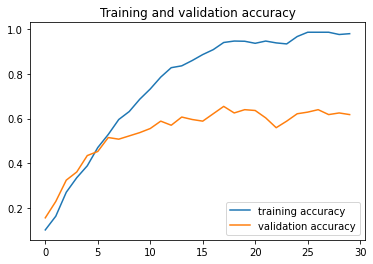

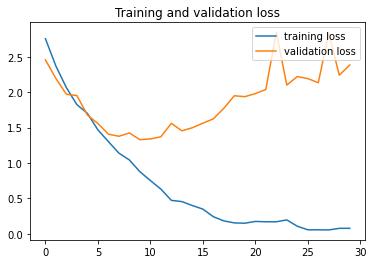

In [70]:
accuracy_cnn = history_cnn.history['acc']
val_accuracy_cnn = history_cnn.history['val_acc']
loss_cnn = history_cnn.history['loss']
val_loss_cnn = history_cnn.history['val_loss']

epochs   = range(len(accuracy_cnn)) # Get number of epochs

plt.plot  (epochs, accuracy_cnn, label = 'training accuracy')
plt.plot  (epochs, val_accuracy_cnn, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss_cnn, label = 'training loss')
plt.plot  (epochs, val_loss_cnn, label = 'validation loss')
plt.title ('Training and validation loss')
plt.legend(loc = 'upper right')

In [71]:
CNN_perf_met = pd.DataFrame({'Method':['Convolutional Neural Network'], 'Train accuracy': max(accuracy_cnn), 
                           'Test accuracy': max(val_accuracy_cnn)})
print('Convolutional Neural Network Performance Metric :\n\n', CNN_perf_met)

Convolutional Neural Network Performance Metric :

                          Method  Train accuracy  Test accuracy
0  Convolutional Neural Network        0.987132       0.654412


**E. Identify best performing model and use it for further prediction**

In [72]:
Comparison1 = pd.DataFrame({'Method':['Logistic Regression'], 'Train accuracy': LogReg_Accuracy_Train, 
                           'Test accuracy': LogReg_Accuracy_Test})
Comparison1 = Comparison1[['Method', 'Train accuracy', 'Test accuracy']]


Comparison2 = pd.DataFrame({'Method':['Neural Network'], 'Train accuracy': max(accuracy), 
                           'Test accuracy': max(val_accuracy)})
Comparison2 = Comparison2[['Method', 'Train accuracy', 'Test accuracy']]


Comparison3 = pd.DataFrame({'Method':['Convolutional Neural Network'], 'Train accuracy': max(accuracy_cnn), 
                           'Test accuracy': max(val_accuracy_cnn)})
Comparison3 = Comparison3[['Method', 'Train accuracy', 'Test accuracy']]

Comparison = pd.concat([Comparison1, Comparison2,Comparison3])

Comparison

Method  Train accuracy  Test accuracy
0           Logistic Regression        0.533088       0.330882
0                Neural Network        0.956801       0.525735
0  Convolutional Neural Network        0.987132       0.654412

It is clear from the above statistics that CNN has the highest test accuracy. Therefore CNN has been chosen for further prediction.

In [73]:
# Mounting google drive on colab instance

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
pred_image="/content/drive/My Drive/Colab Notebooks/Prediction.jpg"

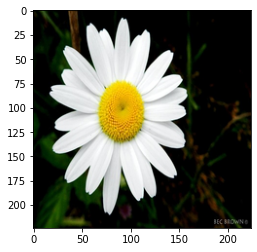

In [75]:
predict_image = mpimg.imread(pred_image)
plt.imshow(predict_image)
plt.show()

In [76]:
# Resize the image according to our CNN

p_image = cv2.resize(predict_image, (224 , 224))

In [77]:

y_pred = classifier.predict(predict_image.reshape(1, 224,224,3))
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Softmax Outputs: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


According to the softmax output the label our model has predicted for the test image 'Predicted.jpg' is 2